### Creating ANN using Pytorch using Pima Diabetes dataset

In [36]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
X = df.drop('Outcome',axis=1).values # independent features
y = df['Outcome'].values # dependent features

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
# Libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
# Creating Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [72]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [73]:
# instantiate my ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [74]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [75]:
# Backward Propagation -- Define the loss_function, define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [81]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print("Epoch number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 0.34505003690719604
Epoch number: 11 and the loss: 0.38074490427970886
Epoch number: 21 and the loss: 0.38248586654663086
Epoch number: 31 and the loss: 0.37960097193717957
Epoch number: 41 and the loss: 0.3610149323940277
Epoch number: 51 and the loss: 0.3447760045528412
Epoch number: 61 and the loss: 0.33317169547080994
Epoch number: 71 and the loss: 0.34481281042099
Epoch number: 81 and the loss: 0.37832602858543396
Epoch number: 91 and the loss: 0.3609868288040161
Epoch number: 101 and the loss: 0.3596053719520569
Epoch number: 111 and the loss: 0.33505550026893616
Epoch number: 121 and the loss: 0.33140408992767334
Epoch number: 131 and the loss: 0.31829631328582764
Epoch number: 141 and the loss: 0.3162001371383667
Epoch number: 151 and the loss: 0.32383114099502563
Epoch number: 161 and the loss: 0.37567856907844543
Epoch number: 171 and the loss: 0.32044798135757446
Epoch number: 181 and the loss: 0.3511032164096832
Epoch number: 191 and the loss: 

In [92]:
## plot the loss function
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

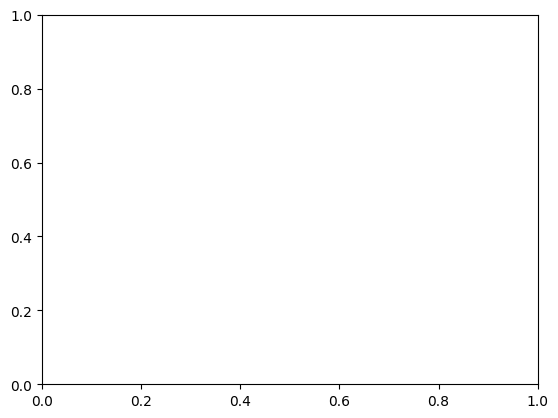

In [93]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [94]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad(): # disable gradient 
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0


In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[88, 19],
       [23, 24]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted values')

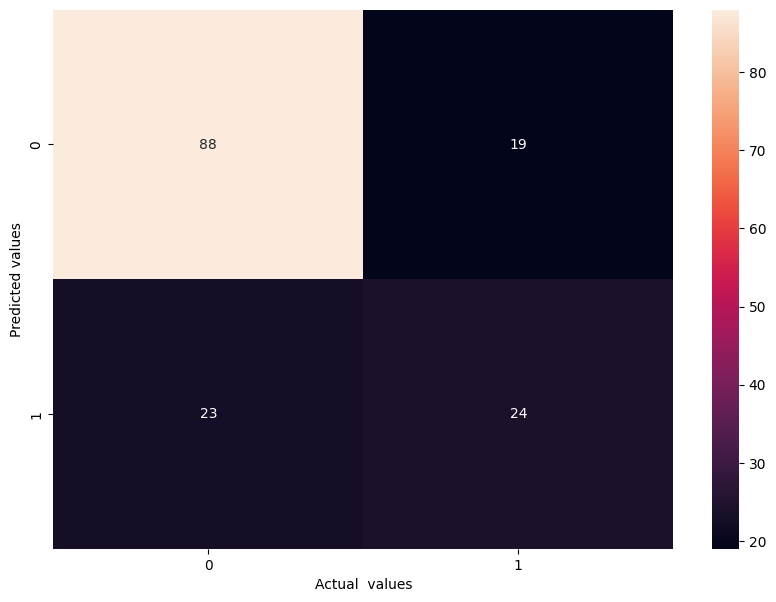

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual  values')
plt.ylabel('Predicted values')

In [97]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

0.7272727272727273

In [98]:
## Save the model
torch.save(model,'diabetes.pt')

In [99]:
model = torch.load('diabetes.pt') # save and load the model

In [100]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [101]:
## Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [105]:
# new data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [106]:
new_data = torch.tensor(lst1)

In [107]:
# Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.8858, 2.6857])
1
